# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** K

**Names:**

*  Xavier Jeanmonod
*  Adrian Baudat
*  Simon Wicky

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import networkx as nx
import numpy as npy
from graph_utility import *
import matplotlib.pyplot as plt
import math

In [2]:
Data = open('../data/network1.csv', "r")
next(Data,None)
Graphtype = nx.Graph()
G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,
                      nodetype=int)
print("Number of edges : " + str(len(G.edges)))
print("Number of nodes : " + str(len(G.nodes)))

Number of edges : 18584
Number of nodes : 13033


#### Exercise 2.2:  Node degree distribution

Average degree : 2.8518376429064682
Max degree : 1482


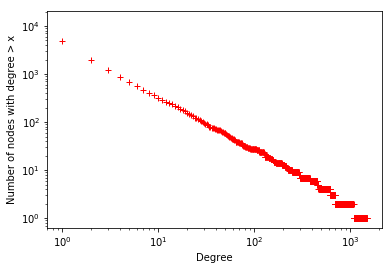

In [37]:
nodesDeg = G.degree()
degrees = [d[1] for d in nodesDeg]
print("Average degree : " + str(sum(degrees) / len(degrees)))
print("Max degree : " + str(max(degrees)))
histo = histogram(degrees)
datas = [0] * (max(degrees) + 1)
for i in range(len(histo)):
    datas[histo[i][0]] = histo[i][1]

for i in range(len(datas)):
    datas[i] = sum(datas[i+1::])   
plt.plot(datas, 'r+')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Number of nodes with degree > x")
plt.show()

#### Exercise 2.3: Giant component

In [31]:
print("Number of connected components : " + str(nx.number_connected_components(G)))
size = [len(o) for o in nx.connected_components(G)]
hist = histogram(size)
print("Histogram of connected components (size : number of CC)")
for i in hist:
        print(str(i[0]) + " : " + str(str(i[1])))
    

Number of connected components : 192
Histogram of connected components (size : number of CC)
2 : 149
3 : 29
4 : 7
5 : 3
6 : 1
7 : 1
16 : 1
12576 : 1


Looking at the data above, we can see that there is 192 connected components, with one giant component of size 12756

#### Exercise 2.4: Short paths & Small-worlds

In [32]:
from random import choice

#Isolating giant component. The graph need to be connected for these operations
giant_cc = [e for e in nx.connected_component_subgraphs(G) if len(e.nodes()) == max(size)][0]

NB_ITERATIONS = 1000
NB_HOPS = 6

sum_nodes = 0
sum_path_length = 0

for i in range(NB_ITERATIONS):
    random_node1 = choice(list(giant_cc.nodes))
    random_node2 = choice(list(giant_cc.nodes))
    sum_path_length += nx.shortest_path_length(giant_cc, source= random_node1, target=random_node2)
    sum_nodes += len(numberOfNodesHops(random_node1, NB_HOPS, giant_cc))
  
print("Average over " + str(NB_ITERATIONS) + " nodes")
print("Average of nodes reachable in " + str(NB_HOPS) + " hops : " + str(sum_nodes / NB_ITERATIONS))
print("Average of path length : " + str(sum_path_length / NB_ITERATIONS))



Average over 1000 nodes
Average of nodes reachable in 6 hops : 12289.61
Average of path length : 4.158


To analyse the network to determine if it is a small world, we look at an average of shortest path between random nodes, as well as the number of nodes reachable in a given amount of hops.

Ran over 1000 iterations we found the following :
* Reachable in 6 hops : 12506 nodes
* Average of shortest path : 4.153

In 6 hops, we can on average reach 12506 different nodes, which represents 99.44% of the giant component.
We can therefore conclude that this network is a small-world

#### Exercise 2.5: Network comparison

In [27]:
Data2 = open('../data/network2.csv', "r")
next(Data2,None)
Graphtype = nx.Graph()
G2 = nx.parse_edgelist(Data2, delimiter=',', create_using=Graphtype,
                      nodetype=int)
print("Number of edges : " + str(len(G2.edges)))
print("Number of nodes : " + str(len(G2.nodes)))

Number of edges : 43516
Number of nodes : 26542


Average degree : 3.2790294627383014
Max degree : 8


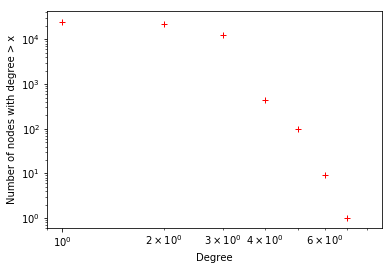

In [36]:
nodesDeg2 = G2.degree()
degrees2 = [d[1] for d in nodesDeg2]
print("Average degree : " + str(sum(degrees2) / len(degrees2)))
print("Max degree : " + str(max(degrees2)))
histo2 = histogram(degrees2)
datas2 = [0] * (max(degrees2) + 1)
for i in range(len(histo2)):
    datas2[histo2[i][0]] = histo2[i][1]

for i in range(len(datas2)):
    datas2[i] = sum(datas2[i+1::])   
plt.plot(datas2, 'r+')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Number of nodes with degree > x")
plt.show()

In [29]:
print("Number of connected components : " + str(nx.number_connected_components(G2)))
size2 = [len(o) for o in nx.connected_components(G2)]
hist2 = histogram(size2)
print("Histogram of connected components (size : number of CC)")
for i in hist2:
    print(str(i[0]) + " : " + str(str(i[1])))
    

Number of connected components : 5
Histogram of connected components (size : number of CC)
2 : 1
5 : 1
24 : 1
30 : 1
26481 : 1


Looking at the data above, we can see that there is 5 connected components, with one giant component of size 26481

In [9]:
from random import choice

#Isolating giant component. The graph need to be connected for these operations
giant_cc2 = [e for e in nx.connected_component_subgraphs(G2) if len(e.nodes()) == max(size2)][0]

NB_ITERATIONS = 1000
NB_HOPS = 6

sum_nodes = 0
sum_path_length = 0

for i in range(NB_ITERATIONS):
    random_node1 = choice(list(giant_cc2.nodes))
    random_node2 = choice(list(giant_cc2.nodes))
    sum_path_length += nx.shortest_path_length(giant_cc2, source= random_node1, target=random_node2)
    sum_nodes += len(numberOfNodesHops(random_node1, NB_HOPS, giant_cc2))
  
print("Average over " + str(NB_ITERATIONS) + " nodes")
print("Average of nodes reachable in " + str(NB_HOPS) + " hops : " + str(sum_nodes / NB_ITERATIONS))
print("Average of path length : " + str(sum_path_length / NB_ITERATIONS))

Average over 1000 nodes
Average of nodes reachable in 6 hops : 63.997
Average of path length : 96.01


To analyse the network to determine if it is a small world, we look at an average of shortest path between random nodes, as well as the number of nodes reachable in a given amount of hops.

Ran over 1000 iterations we found the following :
* Reachable in 6 hops : 63.997 nodes
* Average of shortest path : 96.01

In 6 hops, we can on average reach 64 different nodes, which represents 0.24% of the giant component.
We can therefore conclude that this network is not a small-world

##### Network comparison
This network is way less connected than the first one.
The maximum degree for a node doesn't excede 10, and with a given number of hops, we can reach only a small portion of the graph

#### Exercise 2.6: Network identification

Looking at the results above, we can make the guess that network1 is a subgraph of routeurs comprising the Internet and that network2 is the network of roads of New York for the following reason : 
* Network1 has degrees that are irrealist for roads intersection
* Network1 has a small world structure which is more suitable to the internet
* Network2 has less connected components, which suits the idea of a road network
* Network2 has a max degree of 8, which is compatible with a road network